In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multilingual-mobile-app-reviews-dataset-2025/multilingual_mobile_app_reviews_2025.csv


In [4]:
# We import Pandas and NumPy for data manipulation, Matplotlib and Seaborn for visualization, and WordCloud for text visualization. Seaborn’s whitegrid style makes plots cleaner.
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Settings
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [16]:
# start by loading the dataset and checking the first few rows. df.info() shows data types and missing values, and df.describe() gives a quick overview of numeric columns.
df = pd.read_csv("../input/multilingual-mobile-app-reviews-dataset-2025/multilingual_mobile_app_reviews_2025.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          2514 non-null   int64  
 1   user_id            2514 non-null   int64  
 2   app_name           2514 non-null   object 
 3   app_category       2514 non-null   object 
 4   review_text        2455 non-null   object 
 5   review_language    2514 non-null   object 
 6   rating             2477 non-null   float64
 7   review_date        2514 non-null   object 
 8   verified_purchase  2514 non-null   bool   
 9   device_type        2514 non-null   object 
 10  num_helpful_votes  2514 non-null   int64  
 11  user_age           2514 non-null   float64
 12  user_country       2473 non-null   object 
 13  user_gender        1927 non-null   object 
 14  app_version        2484 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 277.6+ KB


,review_id,user_id,rating,num_helpful_votes,user_age
count,2514.000000,2.514000e+03,2477.000000,2514.000000,2514.000000
mean,1257.500000,5.080737e+06,3.021034,616.704057,44.247812
std,725.873612,2.846939e+06,1.149955,363.745326,18.372290
min,1.000000,1.005990e+05,1.000000,0.000000,13.000000
25%,629.250000,2.595184e+06,2.100000,287.250000,28.000000
50%,1257.500000,5.059846e+06,3.000000,620.000000,44.000000
75%,1885.750000,7.571874e+06,4.000000,920.750000,60.000000
max,2514.000000,9.995027e+06,5.000000,1249.000000,75.000000


In [17]:
# Parse review_date
df['review_date'] = pd.to_datetime(df['review_date'])

# Handle missing categorical values
df['user_gender'].fillna('Unknown', inplace=True)
df['user_country'].fillna('Unknown', inplace=True)
df['review_text'].fillna('', inplace=True)
df['app_version'].fillna('Unknown', inplace=True)
# Fill with median
df['rating'].fillna(df['rating'].median(), inplace=True)

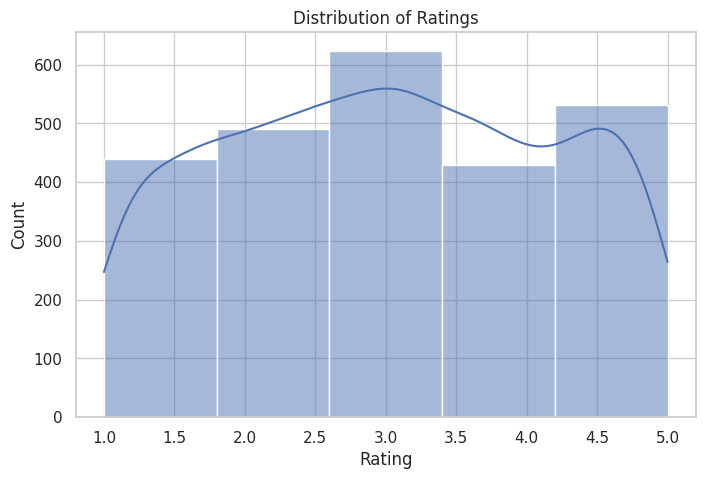

In [19]:
# Histogram is used for numeric data to see distribution and skewness. Ratings are numeric, so histogram shows which ratings are most common.
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=5, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


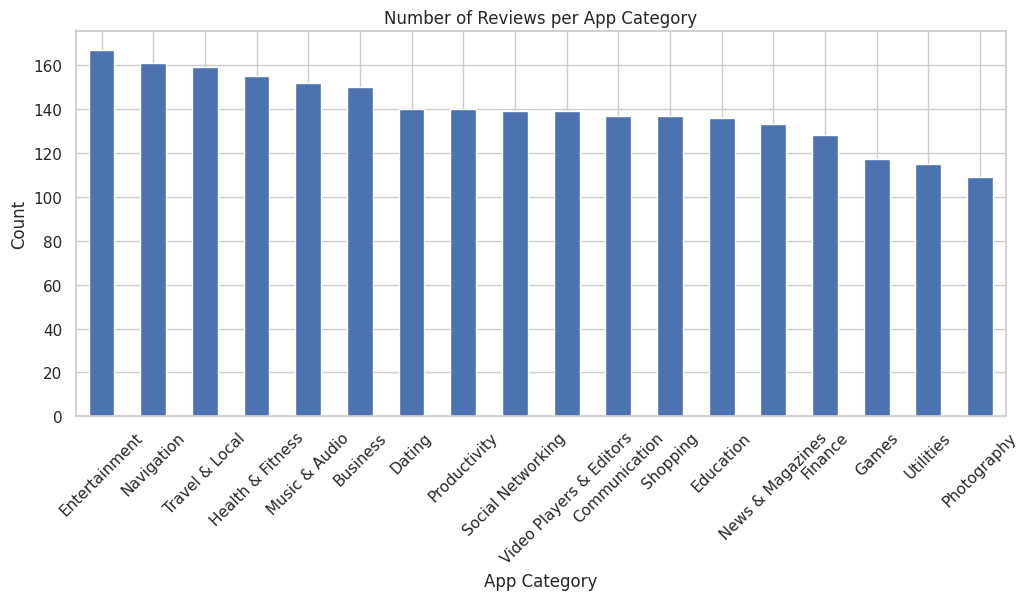

In [26]:
# Barplots are used for categorical variables. Here, we visualize which app categories have the most reviews.
plt.figure(figsize=(12,5))
df['app_category'].value_counts().plot(kind='bar')
plt.title("Number of Reviews per App Category")
plt.xlabel("App Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='device_type', ylabel='count'>

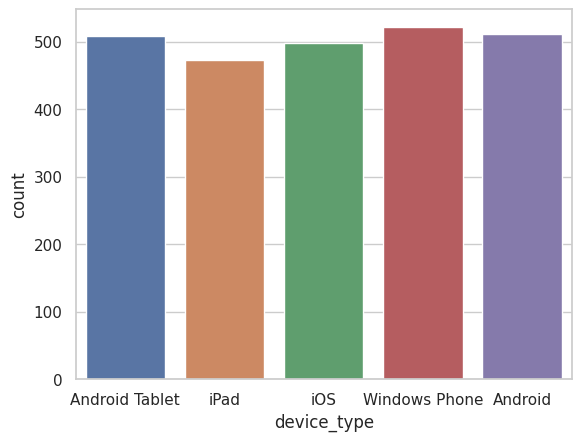

In [24]:
# Countplot is similar to barplot but directly works with categorical column counts. It shows the distribution of reviews by device type.
sns.countplot(x='device_type', data=df)



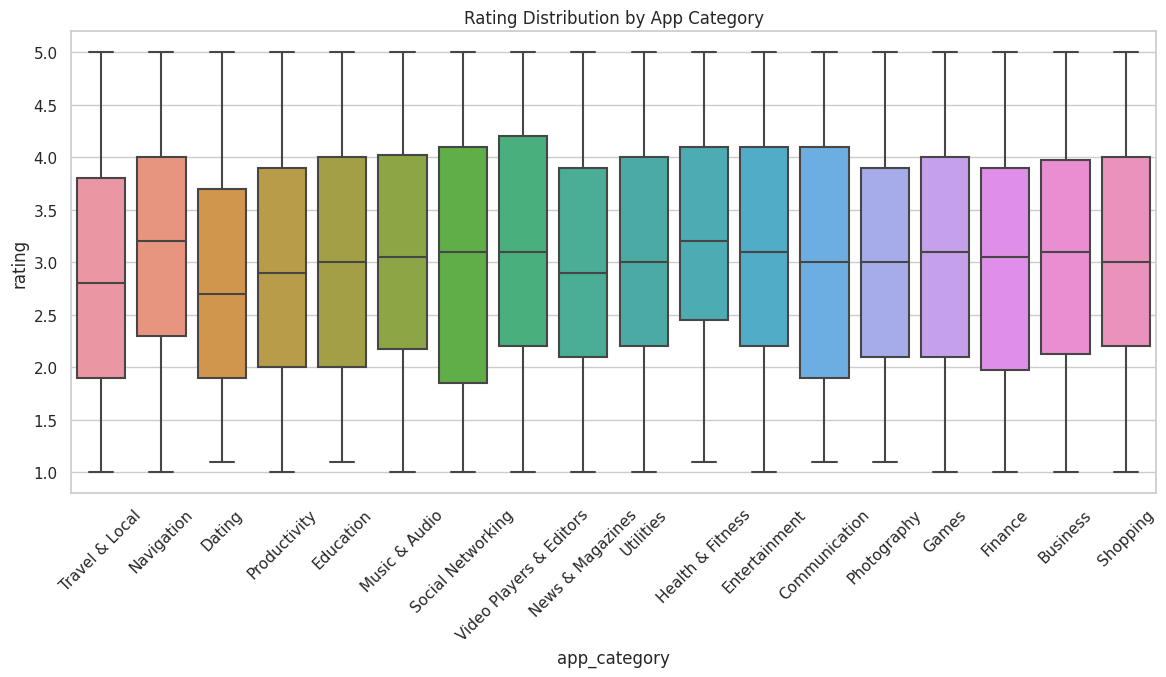

In [30]:
# Boxplots are useful to see the distribution, median, and outliers of numeric data across categories. Here we compare ratings across app categories
plt.figure(figsize=(14,6))
sns.boxplot(x='app_category', y='rating', data=df)
plt.xticks(rotation=45)
plt.title("Rating Distribution by App Category")
plt.show()


<Axes: xlabel='sentiment', ylabel='rating'>

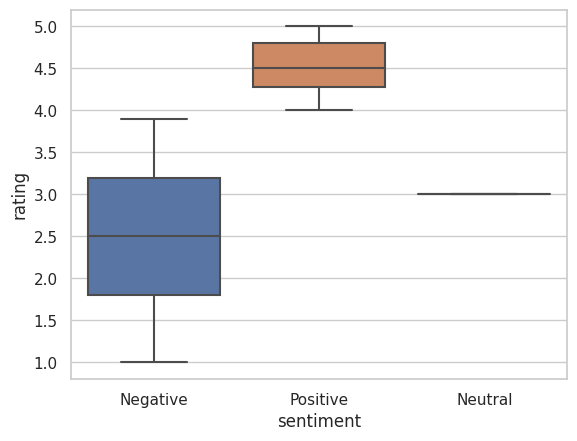

In [33]:
# Boxplots are also useful for comparing derived categories with numeric data. Sentiment analysis can show how ratings are distributed for Positive, Neutral, and Negative reviews.
def rating_to_sentiment(r):
    if r >= 4:
        return "Positive"
    elif r == 3:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['rating'].apply(rating_to_sentiment)

sns.boxplot(x='sentiment', y='rating', data=df)


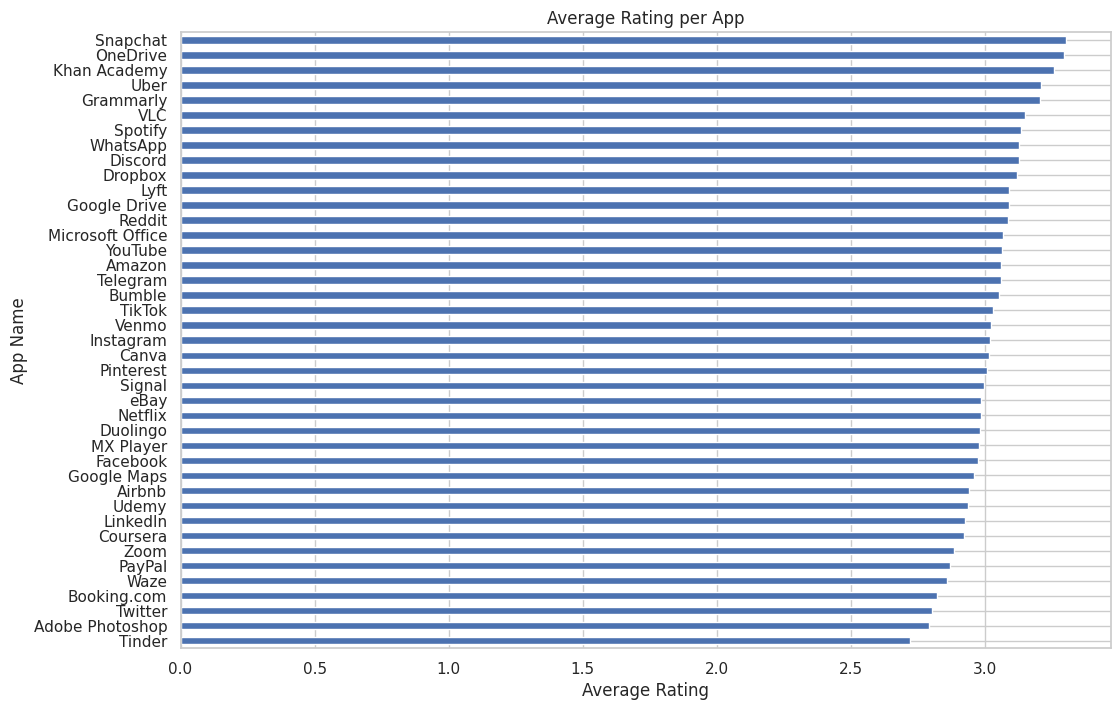

In [34]:
# Horizontal barplots are great for ranking items by numeric values. Here, apps are sorted by average rating for easy comparison.
avg_ratings = df.groupby('app_name')['rating'].mean().sort_values()
plt.figure(figsize=(12,8))
avg_ratings.plot(kind='barh')
plt.title("Average Rating per App")
plt.xlabel("Average Rating")
plt.ylabel("App Name")
plt.show()


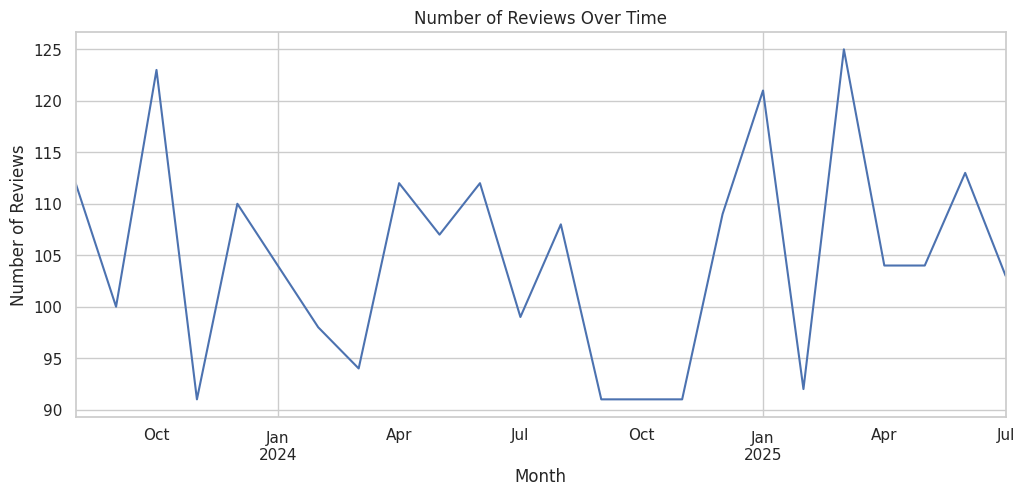

In [35]:
# Line plots are used for time series analysis. Here, we track how reviews vary over months/years.
reviews_per_month = df.groupby(df['review_date'].dt.to_period('M')).size()
reviews_per_month.plot(figsize=(12,5))
plt.title("Number of Reviews Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.show()


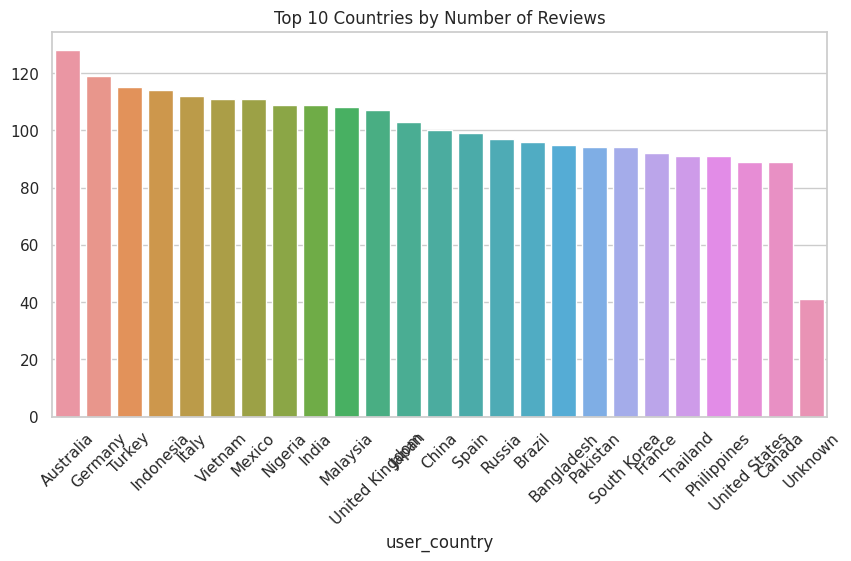

In [37]:
# Barplots are perfect for comparing categories with counts. Here, we see which countries contribute the most reviews.
top_countries = df['user_country'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries by Number of Reviews")
plt.xticks(rotation=45)
plt.show()
